In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [29]:
data = pd.read_csv('dataset_final.csv')
data

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
0,1,212600,False,1,77,4WUepByoeqcedHoYhSNHRt,Welcome To New York (Taylor's Version),0.757,0.610,7.0,...,116.998,4WUepByoeqcedHoYhSNHRt,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
1,1,231833,False,2,78,0108kcWLnn2HlH2kedi1gn,Blank Space (Taylor's Version),0.733,0.733,0.0,...,96.057,0108kcWLnn2HlH2kedi1gn,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
2,1,231000,False,3,79,3Vpk1hfMAQme8VJ0SNRSkd,Style (Taylor's Version),0.511,0.822,11.0,...,94.868,3Vpk1hfMAQme8VJ0SNRSkd,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
3,1,235800,False,4,78,1OcSfkeCg9hRC2sFKB4IMJ,Out Of The Woods (Taylor's Version),0.545,0.885,0.0,...,92.021,1OcSfkeCg9hRC2sFKB4IMJ,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
4,1,193289,False,5,77,2k0ZEeAqzvYMcx9Qt5aClQ,All You Had To Do Was Stay (Taylor's Version),0.588,0.721,0.0,...,96.997,2k0ZEeAqzvYMcx9Qt5aClQ,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1,201106,False,11,70,1j6gmK6u4WNI33lMZ8dC1s,Our Song,0.668,0.672,2.0,...,89.011,1j6gmK6u4WNI33lMZ8dC1s,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,Thirteen
535,1,213053,False,12,60,7CzxXgQXurKZCyHz9ufbo1,I'm Only Me When I'm With You,0.563,0.934,8.0,...,143.964,7CzxXgQXurKZCyHz9ufbo1,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,Thirteen
536,1,203226,False,13,58,1k3PzDNjg38cWqOvL4M9vq,Invisible,0.612,0.394,7.0,...,96.001,1k3PzDNjg38cWqOvL4M9vq,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,Thirteen
537,1,220146,False,14,58,0YgHuReCSPwTXYny7isLja,A Perfectly Good Heart,0.483,0.751,4.0,...,156.092,0YgHuReCSPwTXYny7isLja,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,Thirteen


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   disc_number                      539 non-null    int64  
 1   duration_ms                      539 non-null    int64  
 2   explicit                         539 non-null    object 
 3   track_number                     539 non-null    int64  
 4   track_popularity                 539 non-null    int64  
 5   track_id                         531 non-null    object 
 6   track_name                       532 non-null    object 
 7   audio_features.danceability      537 non-null    float64
 8   audio_features.energy            537 non-null    float64
 9   audio_features.key               538 non-null    float64
 10  audio_features.loudness          537 non-null    float64
 11  audio_features.mode              539 non-null    int64  
 12  audio_features.speechi

Sugiero cambiar la forma de cronometrar la duración de milisegundos a minutos

In [31]:
data['duration_ms']

0      212600
1      231833
2      231000
3      235800
4      193289
        ...  
534    201106
535    213053
536    203226
537    220146
538    179066
Name: duration_ms, Length: 539, dtype: int64

Se evalua la cantidad de nulos por columnas

In [32]:
valores_nulos_por_columna = data.isnull().sum()
valores_nulos_por_columna

disc_number                         0
duration_ms                         0
explicit                            0
track_number                        0
track_popularity                    0
track_id                            8
track_name                          7
audio_features.danceability         2
audio_features.energy               2
audio_features.key                  1
audio_features.loudness             2
audio_features.mode                 0
audio_features.speechiness          1
audio_features.acousticness         1
audio_features.instrumentalness     0
audio_features.liveness             1
audio_features.valence              0
audio_features.tempo                1
audio_features.id                   0
audio_features.time_signature       1
artist_id                           0
artist_name                         0
artist_popularity                   0
album_id                            0
album_name                         62
album_release_date                  0
album_total_

Se ve la cantidad de veces que se repite el nombre de una canción

In [33]:
valores_repetidos = []
valores = data['track_name'].value_counts()
for valor, frecuencia in valores.items():
    if frecuencia > 1:
        valores_repetidos.append((valor, frecuencia))
valores_repetidos

[('The Story Of Us', 4),
 ('Sweet Nothing', 3),
 ('Lavender Haze', 3),
 ('Question...?', 3),
 ('Midnight Rain', 3),
 ("You're On Your Own, Kid", 3),
 ('Snow On The Beach (feat. Lana Del Rey)', 3),
 ('my tears ricochet', 3),
 ('Maroon', 3),
 ('exile (feat. Bon Iver)', 3),
 ('Bejeweled', 3),
 ('Out Of The Woods', 3),
 ('the last great american dynasty', 3),
 ('Change', 3),
 ('Enchanted', 3),
 ('Fearless', 3),
 ('cardigan', 3),
 ('Vigilante Shit', 3),
 ('Labyrinth', 3),
 ('epiphany', 3),
 ('Karma', 3),
 ('Back To December', 3),
 ('This Love', 3),
 ('mirrorball', 3),
 ('seven', 3),
 ('august', 3),
 ('Breathe', 3),
 ('this is me trying', 3),
 ('illicit affairs', 3),
 ('invisible string', 3),
 ('Forever & Always', 3),
 ('mad woman', 3),
 ('hoax', 3),
 ('peace', 3),
 ('the 1', 3),
 ('Hey Stephen', 3),
 ('Speak Now', 3),
 ('Welcome To New York', 3),
 ('The Best Day', 3),
 ('Wildest Dreams', 3),
 ('I Know Places', 3),
 ('Mean', 3),
 ('How You Get The Girl', 3),
 ('Fifteen', 3),
 ('Sparks Fly', 

Se ve la cantidad de veces que se repite el id de una canción

In [34]:
valores_repetidos = []
valores = data['track_id'].value_counts()
for valor, frecuencia in valores.items():
    if frecuencia > 1:
        valores_repetidos.append((valor, frecuencia))
valores_repetidos

[('1fzAuUVbzlhZ1lJAx9PtY6', 2),
 ('2dgFqt3w9xIQRjhPtwNk3D', 2),
 ('1dGr1c8CrMLDpV6mPbImSI', 2),
 ('3pHkh7d0lzM2AldUtz2x37', 2),
 ('2YWtcWi3a83pdEg3Gif4Pd', 2),
 ('214nt20w5wOxJnY462klLw', 2),
 ('4y5bvROuBDPr5fuwXbIBZR', 2),
 ('12M5uqx0ZuwkpLp5rJim1a', 2),
 ('1LLXZFeAHK9R4xUramtUKw', 2),
 ('43rA71bccXFGD4C8GOpIlN', 2),
 ('4AYtqFyFbX0Xkc2wtcygTr', 2),
 ('5hQSXkFgbxjZo9uCwd11so', 2),
 ('6RRNNciQGZEXnqk8SQ9yv5', 2),
 ('1SymEzIT3H8UZfibCs3TYi', 2),
 ('2Rk4JlNc2TPmZe2af99d45', 2),
 ('1SmiQ65iSAbPto6gPFlBYm', 2),
 ('1BxfuPKGuaTgP7aM0Bbdwr', 2),
 ('3RauEVgRgj1IuWdJ9fDs70', 2),
 ('3xYJScVfxByb61dYHTwiby', 2)]

Se compara las dos situaciones

In [35]:
duplicados = data[data.duplicated('track_id', keep=False)]
duplicados

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
85,1,234466,True,21,82,3xYJScVfxByb61dYHTwiby,Hits Different,0.672,0.782,5.0,...,106.026,3xYJScVfxByb61dYHTwiby,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1fnJ7k0bllNfL1kVdNVW1A,Midnights (The Til Dawn Edition),2027-05-26,24
88,1,234466,True,21,82,3xYJScVfxByb61dYHTwiby,Hits Different,0.672,0.782,5.0,...,106.026,3xYJScVfxByb61dYHTwiby,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1fnJ7k0bllNfL1kVdNVW1A,Midnights (The Til Dawn Edition),2027-05-26,24
277,1,170640,False,1,77,43rA71bccXFGD4C8GOpIlN,I Forgot That You Existed,0.664,0.316,5.0,...,92.875,43rA71bccXFGD4C8GOpIlN,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
278,1,178426,False,2,99,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,0.552,0.702,9.0,...,169.994,1BxfuPKGuaTgP7aM0Bbdwr,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
279,1,221306,False,3,92,1dGr1c8CrMLDpV6mPbImSI,Lover,0.359,0.543,7.0,...,68.534,1dGr1c8CrMLDpV6mPbImSI,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
280,1,190360,False,4,86,3RauEVgRgj1IuWdJ9fDs70,The Man,0.777,0.658,0.0,...,110.048,3RauEVgRgj1IuWdJ9fDs70,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
281,1,211240,False,5,82,3pHkh7d0lzM2AldUtz2x37,The Archer,0.292,0.574,0.0,...,124.344,3pHkh7d0lzM2AldUtz2x37,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
282,1,173386,False,6,78,2YWtcWi3a83pdEg3Gif4Pd,I Think He Knows,0.897,0.366,0.0,...,100.003,2YWtcWi3a83pdEg3Gif4Pd,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
283,1,234146,False,7,83,214nt20w5wOxJnY462klLw,Miss Americana & The Heartbreak Prince,0.662,0.747,11.0,...,150.088,214nt20w5wOxJnY462klLw,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
284,1,222400,False,8,86,4y5bvROuBDPr5fuwXbIBZR,Paper Rings,0.811,0.719,9.0,...,103.979,4y5bvROuBDPr5fuwXbIBZR,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18


In [36]:
duplicados = data[data.duplicated('track_name', keep=False)]
duplicados

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
0,1,212600,False,1,77,4WUepByoeqcedHoYhSNHRt,Welcome To New York (Taylor's Version),0.757,0.610,7.0,...,116.998,4WUepByoeqcedHoYhSNHRt,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
1,1,231833,False,2,78,0108kcWLnn2HlH2kedi1gn,Blank Space (Taylor's Version),0.733,0.733,0.0,...,96.057,0108kcWLnn2HlH2kedi1gn,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
2,1,231000,False,3,79,3Vpk1hfMAQme8VJ0SNRSkd,Style (Taylor's Version),0.511,0.822,11.0,...,94.868,3Vpk1hfMAQme8VJ0SNRSkd,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
3,1,235800,False,4,78,1OcSfkeCg9hRC2sFKB4IMJ,Out Of The Woods (Taylor's Version),0.545,0.885,0.0,...,92.021,1OcSfkeCg9hRC2sFKB4IMJ,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
4,1,193289,False,5,77,2k0ZEeAqzvYMcx9Qt5aClQ,All You Had To Do Was Stay (Taylor's Version),0.588,0.721,0.0,...,96.997,2k0ZEeAqzvYMcx9Qt5aClQ,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,1,199200,False,4,60,1oR4MUBpyNrAViC8wPNpfm,A Place in this World,0.576,0.777,9.0,...,115.028,1oR4MUBpyNrAViC8wPNpfm,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,Thirteen
530,1,248106,False,7,58,2zzxwmoOBnXDT0KnJsoIWk,Tied Together with a Smile,0.479,0.578,2.0,...,146.165,2zzxwmoOBnXDT0KnJsoIWk,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,Thirteen
534,1,201106,False,11,70,1j6gmK6u4WNI33lMZ8dC1s,Our Song,0.668,0.672,2.0,...,89.011,1j6gmK6u4WNI33lMZ8dC1s,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,Thirteen
535,1,213053,False,12,60,7CzxXgQXurKZCyHz9ufbo1,I'm Only Me When I'm With You,0.563,0.934,8.0,...,143.964,7CzxXgQXurKZCyHz9ufbo1,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,Thirteen


In [37]:
duplicados = data[data['track_name'] == "The Story Of Us"]
duplicados

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
366,1,267653,False,38,35,2fF3QzbGCrtrDXIdWcg1mv,The Story Of Us,0.547,0.808,4.0,...,139.908,2fF3QzbGCrtrDXIdWcg1mv,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1MPAXuTVL2Ej5x0JHiSPq8,NaN,2017-11-09,46
451,1,265680,False,7,56,3lXekiVK1ZPZbKconsys73,The Story Of Us,0.575,0.855,9.0,...,139.920,3lXekiVK1ZPZbKconsys73,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6Ar2o9KCqcyYF9J0aQP3au,Speak Now,2010-10-25,14
465,1,265636,False,7,48,7vBlnGdfOLzVEqiOQQxeU8,The Story Of Us,0.575,0.855,9.0,...,139.920,7vBlnGdfOLzVEqiOQQxeU8,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6S6JQWzUrJVcJLK4fi74Fw,Speak Now (Deluxe Package),2010-01-01,22
480,1,266480,False,22,60,2jt90bYlYDg1lXYWES34LJ,The Story Of Us,0.546,0.809,4.0,...,139.910,2jt90bYlYDg1lXYWES34LJ,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6S6JQWzUrJVcJLK4fi74Fw,Speak Now (Deluxe Package),2010-01-01,22


Evaluacion de otliers en las columnas correspondientes y se crea una funcion para eso

In [47]:
def grafica_outliers(nombre):
    columna = data[nombre]
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=columna)
    plt.show()

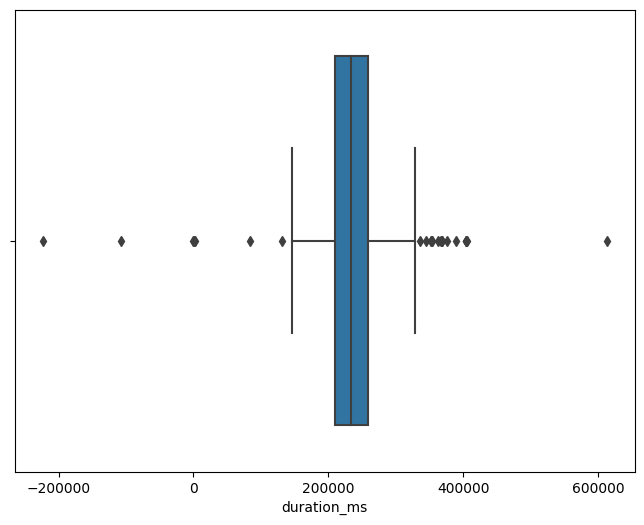

In [48]:
duracion = grafica_outliers('duration_ms')
duracion

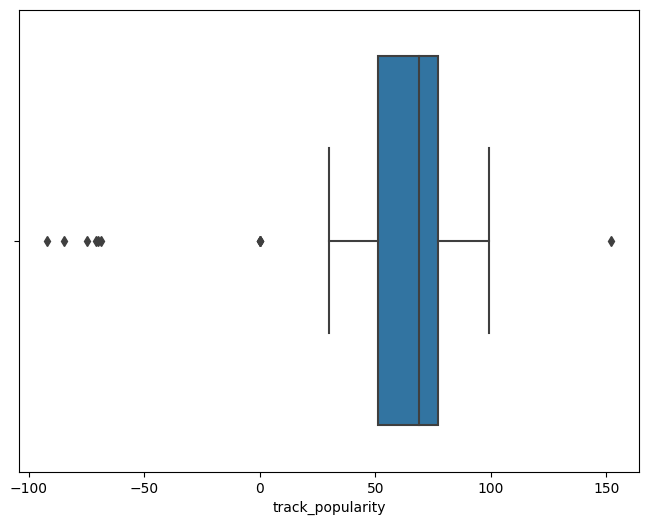

In [49]:
popularidad = grafica_outliers('track_popularity')
popularidad

Se debe cambiar la columna 'audio_features.instrumentalness' a tipo numerico para poder detectar outliesrs

In [54]:
data['audio_features.instrumentalness'] = pd.to_numeric(data['audio_features.instrumentalness'], errors='coerce')
data['audio_features.instrumentalness'] = data['audio_features.instrumentalness'].apply(lambda x: round(x, 2))

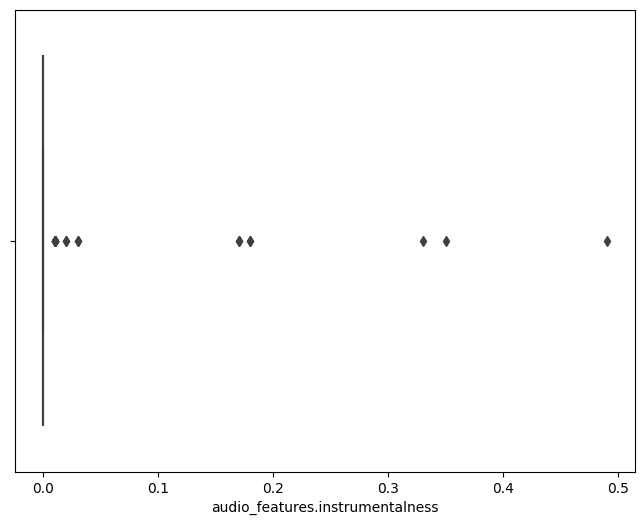

In [55]:
instrumental = grafica_outliers('audio_features.instrumentalness')
instrumental

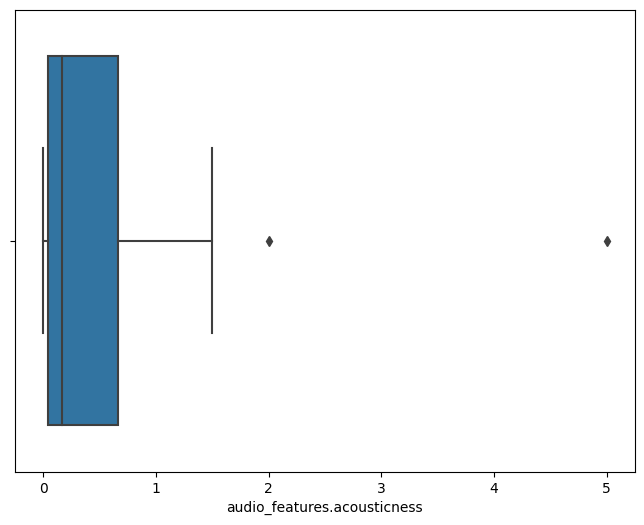

In [58]:
instrumental = grafica_outliers('audio_features.acousticness')
instrumental

In [77]:
outlierss = data[data['audio_features.acousticness'] > 1]
print(outlierss['audio_features.acousticness'])

1      5.0
527    1.5
535    2.0
Name: audio_features.acousticness, dtype: float64


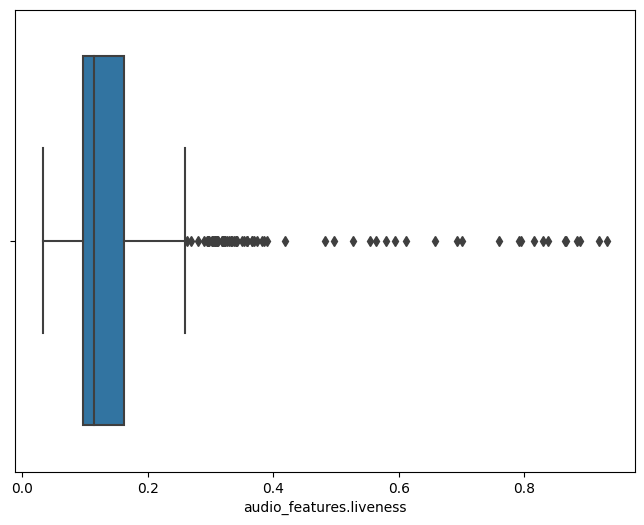

In [60]:
en_vivo = grafica_outliers('audio_features.liveness')
en_vivo

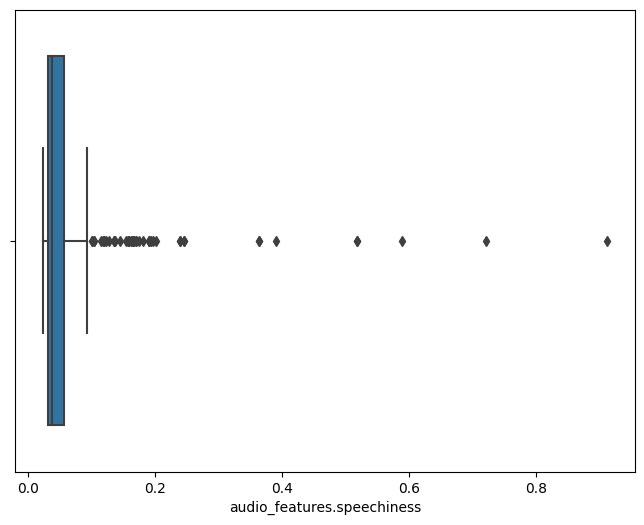

In [62]:
speechiness = grafica_outliers('audio_features.speechiness')
speechiness

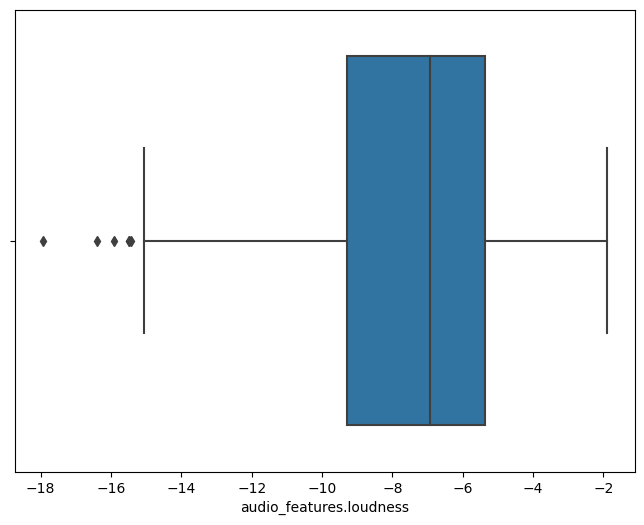

In [63]:
loudness = grafica_outliers('audio_features.loudness')
loudness

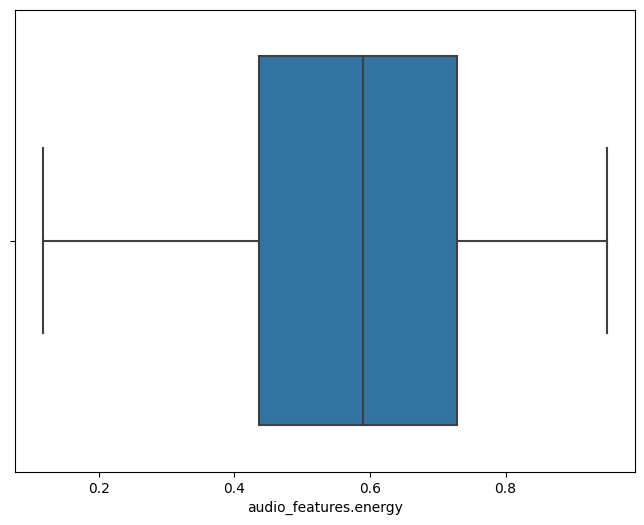

In [64]:
loudness = grafica_outliers('audio_features.energy')
loudness

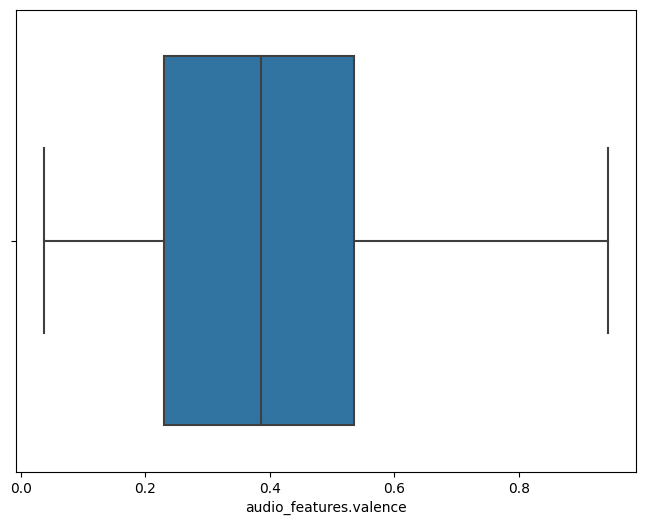

In [68]:
valence = grafica_outliers('audio_features.valence')
valence

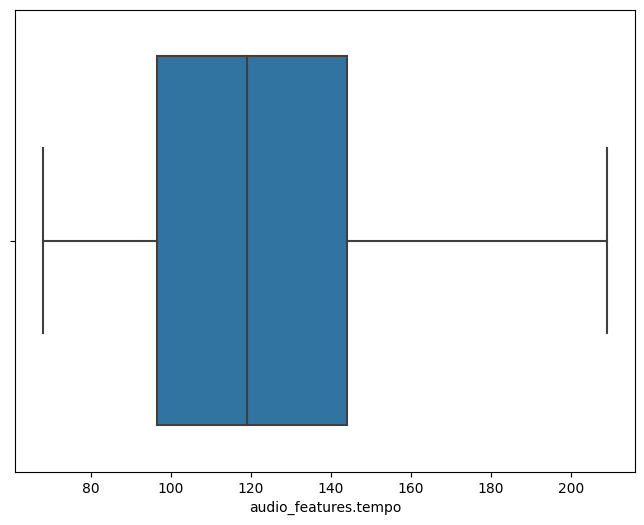

In [69]:
tempo = grafica_outliers('audio_features.tempo')
tempo